In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [5]:
import torch
from torchvision.transforms import ToTensor
from PIL import Image
from torchvision.models import EfficientNet_V2_L_Weights
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import csv
import torch.nn as nn
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import albumentations as A
import cv2
from torch.utils.data import Dataset, DataLoader
from albumentations.augmentations.transforms import Normalize
from sklearn.model_selection import train_test_split
from torchvision.utils import save_image
import os
from pathlib import Path
import torchvision.models as models
from torch import optim
from tqdm import tqdm
import torchvision
torch.cuda.empty_cache()

np.random.seed(10)
torch.manual_seed(10)
torch.cuda.manual_seed(10)
#os.environ['CUDA_VISIBLE_DEVICES']='2, 3'


In [6]:
directory1 = '/content/gdrive/MyDrive/data/train/'
df1 = pd.read_csv("/content/gdrive/MyDrive/data/train.csv")

In [7]:
df1

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC
0,ISIC_0024306,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0024307,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0024308,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0024309,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0024310,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
10010,ISIC_0034316,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10011,ISIC_0034317,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10012,ISIC_0034318,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10013,ISIC_0034319,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [8]:
image_paths = []
for i in df1.index:
    image_paths.append(directory1+df1.iloc[i,0]+'.jpg')
labels = []
for row in df1.index:
    labels.append(np.argmax(df1.iloc[row,1:].values))
labels = np.array(labels)
class_dict = {'MEL':'Melanoma','NV':'Melanocytic nevus','BCC':'Basal cell carnioma','AKIEC':'Actinic keratosis','BKL':'Benign keratoris','DF':'Dermatofibroma','VASC':'Vascular lesion'}
list(class_dict.items())
class_list = list(class_dict.keys())
classnames = []
for i in range(len(labels)):
    for j in range(len(class_list)):
        if labels[i]== j:
            classnames.append(class_list[j])
train_df = pd.DataFrame({'img_paths':image_paths,'labels':labels,'classnames':classnames})


In [9]:
train_df

,img_paths,labels,classnames
0,/content/gdrive/MyDrive/data/train/ISIC_002430...,1,NV
1,/content/gdrive/MyDrive/data/train/ISIC_002430...,1,NV
2,/content/gdrive/MyDrive/data/train/ISIC_002430...,1,NV
3,/content/gdrive/MyDrive/data/train/ISIC_002430...,1,NV
4,/content/gdrive/MyDrive/data/train/ISIC_002431...,0,MEL
...,...,...,...
10010,/content/gdrive/MyDrive/data/train/ISIC_003431...,0,MEL
10011,/content/gdrive/MyDrive/data/train/ISIC_003431...,0,MEL
10012,/content/gdrive/MyDrive/data/train/ISIC_003431...,4,BKL
10013,/content/gdrive/MyDrive/data/train/ISIC_003431...,1,NV


In [10]:
directory2 = '/content/gdrive/MyDrive/data/valid/'
df2 = pd.read_csv("/content/gdrive/MyDrive/data/valid.csv")
image_paths = []
for i in df2.index:
    image_paths.append(directory2+df2.iloc[i,0]+'.jpg')
labels = []
for row in df2.index:
    labels.append(np.argmax(df2.iloc[row,1:].values))
labels = np.array(labels)
class_dict = {'MEL':'Melanoma','NV':'Melanocytic nevus','BCC':'Basal cell carnioma','AKIEC':'Actinic keratosis','BKL':'Benign keratoris','DF':'Dermatofibroma','VASC':'Vascular lesion'}
list(class_dict.items())
class_list = list(class_dict.keys())
classnames = []
for i in range(len(labels)):
    for j in range(len(class_list)):
        if labels[i]== j:
            classnames.append(class_list[j])
valid_df = pd.DataFrame({'img_paths':image_paths,'labels':labels,'classnames':classnames})

In [11]:
valid_df

,img_paths,labels,classnames
0,/content/gdrive/MyDrive/data/valid/ISIC_003432...,1,NV
1,/content/gdrive/MyDrive/data/valid/ISIC_003432...,1,NV
2,/content/gdrive/MyDrive/data/valid/ISIC_003432...,2,BCC
3,/content/gdrive/MyDrive/data/valid/ISIC_003432...,1,NV
4,/content/gdrive/MyDrive/data/valid/ISIC_003432...,1,NV
...,...,...,...
188,/content/gdrive/MyDrive/data/valid/ISIC_003451...,1,NV
189,/content/gdrive/MyDrive/data/valid/ISIC_003452...,1,NV
190,/content/gdrive/MyDrive/data/valid/ISIC_003452...,4,BKL
191,/content/gdrive/MyDrive/data/valid/ISIC_003452...,1,NV


In [12]:
directory3 = '/content/gdrive/MyDrive/data/test/'
df3 = pd.read_csv("/content/gdrive/MyDrive/data/test.csv")
image_paths = []
for i in df3.index:
    image_paths.append(directory3+df3.iloc[i,0]+'.jpg')
labels = []
for row in df3.index:
    labels.append(np.argmax(df3.iloc[row,1:].values))
labels = np.array(labels)
class_dict = {'MEL':'Melanoma','NV':'Melanocytic nevus','BCC':'Basal cell carnioma','AKIEC':'Actinic keratosis','BKL':'Benign keratoris','DF':'Dermatofibroma','VASC':'Vascular lesion'}
list(class_dict.items())
class_list = list(class_dict.keys())
classnames = []
for i in range(len(labels)):
    for j in range(len(class_list)):
        if labels[i]== j:
            classnames.append(class_list[j])
test_df = pd.DataFrame({'img_paths':image_paths,'labels':labels,'classnames':classnames})

In [13]:
test_df

,img_paths,labels,classnames
0,/content/gdrive/MyDrive/data/test/ISIC_0034524...,1,NV
1,/content/gdrive/MyDrive/data/test/ISIC_0034525...,1,NV
2,/content/gdrive/MyDrive/data/test/ISIC_0034526...,4,BKL
3,/content/gdrive/MyDrive/data/test/ISIC_0034527...,1,NV
4,/content/gdrive/MyDrive/data/test/ISIC_0034528...,1,NV
...,...,...,...
1507,/content/gdrive/MyDrive/data/test/ISIC_0036060...,4,BKL
1508,/content/gdrive/MyDrive/data/test/ISIC_0036061...,1,NV
1509,/content/gdrive/MyDrive/data/test/ISIC_0036062...,3,AKIEC
1510,/content/gdrive/MyDrive/data/test/ISIC_0036063...,4,BKL


In [14]:
class isic2018(Dataset):
    def __init__(self,df):
        self.df = df
        self.transform = A.Compose([
                                    A.Resize(224,224),
                                    A.Normalize(mean=(0.763,0.546,0.570),std=(0.141,0.153,0.170)),
                                    ])
    def __len__(self):return len(self.df)
    def __getitem__(self,idx):
        image = cv2.imread(self.df['img_paths'][idx])
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        image = self.transform(image=image)['image']
        image = torch.tensor(image).permute(2,0,1)
        label = self.df['labels'][idx]
        label = torch.tensor(label)
        return image, label    

In [15]:
train_data = isic2018(train_df)
valid_data = isic2018(valid_df)
test_data = isic2018(test_df)
train_loader = DataLoader(train_data,batch_size=16,shuffle=True, num_workers = 2)
val_loader = DataLoader(valid_data,batch_size=16, shuffle= False, num_workers=2)
test_loader = DataLoader(test_data,batch_size=16, shuffle= False, num_workers=2)

In [16]:
print('Train_loader:{}\nVal_loader:{}\nTest_loader:{}'.format(len(train_loader),len(val_loader),len(test_loader)))

Train_loader:626
Val_loader:13
Test_loader:95


In [17]:
eff_net = torchvision.models.efficientnet_v2_l(EfficientNet_V2_L_Weights.DEFAULT)
for param in eff_net.parameters():
    param.requires_grad = True
eff_net.classifier = nn.Sequential(nn.Dropout(p=0.2),
                                   nn.Linear(1280,7,))
model = eff_net

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
Downloading: "https://download.pytorch.org/models/efficientnet_v2_l-59c71312.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_v2_l-59c71312.pth
100%|██████████| 455M/455M [00:01<00:00, 245MB/s]


In [19]:
def mean_accuracy(scores,labels):
    prob = torch.softmax(scores,dim=1)
    equal = (labels.data==prob.max(dim=1)[1])
    size_batch = prob.size(0)
    acc  = (equal.sum()).float()/size_batch
    return acc

In [20]:
#Training phase
def train_phase(train_loader,model,optimizer,criterion,epoch):
    batch_loss,batch_acc=0,0
    mean_train_loss, mean_train_acc =0,0
    model.train()
    for i,data in enumerate(train_loader):
        imgs,labels = data
        imgs,labels = imgs.to('cuda'),labels.to('cuda')
        
        optimizer.zero_grad()
        
        scores = model(imgs)
        loss = criterion(scores,labels)
        batch_loss+=loss.detach().item()
        batch_acc+=mean_accuracy(scores,labels).cpu()
        
        loss.backward()
        optimizer.step()
        
        if (i+1)%300 == 0:
            print('epoch:{}|iter:[{}/{}]|train_loss:{:.3f}|train_acc:{:.3f}'.format(epoch,i+1,len(train_loader),batch_loss/(i+1),batch_acc/(i+1)))
    mean_train_loss = batch_loss/len(train_loader)
    mean_train_acc = batch_acc/len(train_loader)
    
    return mean_train_loss,mean_train_acc

In [21]:
#Validation phase
def val_phase(val_loader,model,criterion,epoch):
    batch_loss,batch_acc=0,0
    mean_val_loss,mean_val_acc=0,0
    model.eval()
    with torch.no_grad():
        for i,data in enumerate(val_loader):
            imgs,labels = data
            imgs,labels = imgs.to('cuda'),labels.to('cuda')
            
            scores = model(imgs)
            loss = criterion(scores,labels)
            batch_loss+=loss.detach().item()
            batch_acc+=mean_accuracy(scores,labels).cpu()
            
        print("--------------------------------------")    
        print('epoch:{}|val_loss:{:.3f}|val_acc:{:.3f}'.format(epoch,batch_loss/len(val_loader),batch_acc/len(val_loader)))
        print("--------------------------------------")
        mean_val_loss = batch_loss/len(val_loader)
        mean_val_acc = batch_acc/len(val_loader)
        
    return mean_val_loss,mean_val_acc

In [22]:
def train(model,epochs,lr,train_loader,val_loader):
    model = model.to('cuda')
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(),lr=lr)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer,patience=1,factor=0.05,mode='max',verbose=True)
    train_loss,train_acc = [],[]
    val_loss ,val_acc = [],[]
    best_val_acc = 0
    count = 0
    for e in tqdm(range(1,epochs+1)):
        #training phase
        mean_train_loss,mean_train_acc = train_phase(train_loader,model,optimizer,criterion,e)
        #validation phase
        mean_val_loss,mean_val_acc = val_phase(val_loader,model,criterion,e)
        scheduler.step(mean_val_loss)
        
        train_loss.append(mean_train_loss)
        train_acc.append(mean_train_acc)
        val_loss.append(mean_val_loss)
        val_acc.append(mean_val_acc)
        
        if mean_val_acc > best_val_acc:
            best_val_acc = mean_val_acc
            print('***************************************')
            print('Best record: [epoch{}],[val_loss:{:.3f}],[val_acc:{:.3f}]'.format(e,mean_val_loss,best_val_acc))
            print('***************************************')
            count=0
        if mean_val_acc < best_val_acc:
            count+=1
        if count == 3: #after 2 epochs with no improvement, we stop training
            print('No improvement, stop training\nBest score: [val_acc:{:.3f}]'.format(best_val_acc))
            break
    return train_loss,train_acc,val_loss,val_acc

In [25]:
epochs = 20
lr = 1e-3
train_loss,train_acc,val_loss,val_acc = train(model,epochs,lr,train_loader,val_loader)

epoch:10|iter:[600/626]|train_loss:0.435|train_acc:0.841


 50%|█████     | 10/20 [1:20:43<1:09:09, 414.96s/it]

--------------------------------------
epoch:10|val_loss:0.442|val_acc:0.841
--------------------------------------
Epoch 00010: reducing learning rate of group 0 to 6.2500e-09.
epoch:11|iter:[300/626]|train_loss:0.429|train_acc:0.841
epoch:11|iter:[600/626]|train_loss:0.430|train_acc:0.841


 50%|█████     | 10/20 [1:27:28<1:27:28, 524.88s/it]

--------------------------------------
epoch:11|val_loss:0.459|val_acc:0.861
--------------------------------------
No improvement, stop training
Best score: [val_acc:0.865]


In [26]:
torch.save(model.state_dict(),'Eff.pth')

Text(0.5, 1.0, 'Acc')

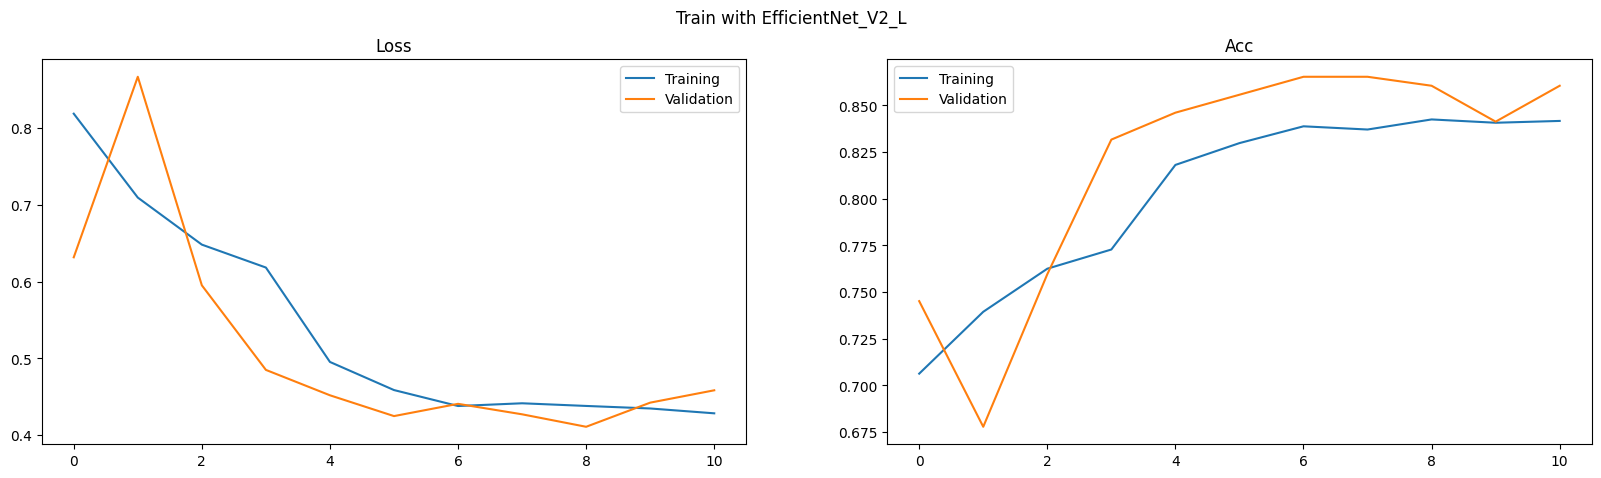

In [27]:
f,axs = plt.subplots(1,2,figsize=(20,5))
f.suptitle('Train with EfficientNet_V2_L',size = 12)
axs[0].plot(train_loss, label='Training')
axs[0].plot(val_loss,label='Validation')
axs[0].set_title('Loss')
axs[0].legend()
axs[1].plot(train_acc, label='Training')
axs[1].plot(val_acc,label='Validation')
axs[1].legend()
axs[1].set_title('Acc')

In [29]:
y_pred = []
y = []
confs = []
acc = 0
predictions_idx = []
model = model
model.eval()
with torch.no_grad():
    for i, data in enumerate(test_loader):
        imgs,labels = data
        imgs,labels = imgs.to('cuda'),labels.to('cuda')
        
        scores = model(imgs)

        acc += mean_accuracy(scores,labels)
        prod = torch.softmax(scores,dim=1)
        pred = prod.max(dim=1)[1]
        conf = prod.max(dim=1)[0]
        confs.append(conf)
        predictions_idx.append(pred)

        y_pred.extend(pred.cpu().detach().numpy())
        y.extend(labels.cpu().detach().numpy())
    mean_acc = acc/len(test_loader)
print(" Test accuracy: {:.3f}%".format(mean_acc*100))

 Test accuracy: 76.053%


In [30]:
def show_predict(batch_idx =0):
    num_image = 16
    cols = 4
    rows = num_image//cols
    show_image = test_df[0+16*batch_idx:num_image+16*batch_idx]
    f,ax = plt.subplots(rows,cols,figsize=(15,8))
    for i in range(len(show_image)):
        img = cv2.imread(show_image.iloc[i,0])
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        true_label = show_image.iloc[i,2]
        predicted_label = label_dict.get(predictions_idx[batch_idx][i].detach().item())
        conf = confs[batch_idx][i].detach().item()
        conf = round(conf, 3)
        color = "green" if true_label == predicted_label else "red"
        ax.ravel()[i].imshow(img)
        ax.ravel()[i].set_axis_off()
        ax.ravel()[i].set_title('Acutal: '+true_label+'\nPred: '+predicted_label+ '\nConf: '+str(conf), color=color)
    plt.tight_layout()
    plt.show()

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [32]:
class_list

['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC']

In [33]:
label_dict = {}
for idx, value in enumerate(class_list):
  dic = {idx:value}
  label_dict.update(dic)
report = classification_report(y,y_pred, target_names = class_list)
print(report)

              precision    recall  f1-score   support

         MEL       0.57      0.53      0.55       171
          NV       0.84      0.94      0.88       909
         BCC       0.53      0.53      0.53        93
       AKIEC       0.42      0.40      0.41        43
         BKL       0.68      0.56      0.62       217
          DF       0.71      0.11      0.20        44
        VASC       0.81      0.49      0.61        35

    accuracy                           0.76      1512
   macro avg       0.65      0.51      0.54      1512
weighted avg       0.75      0.76      0.75      1512



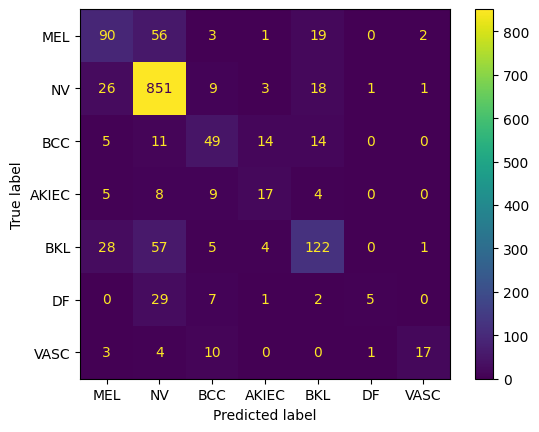

In [34]:
cm = confusion_matrix(y,y_pred)
disp = ConfusionMatrixDisplay(cm,display_labels = class_list)
disp.plot()
plt.show()

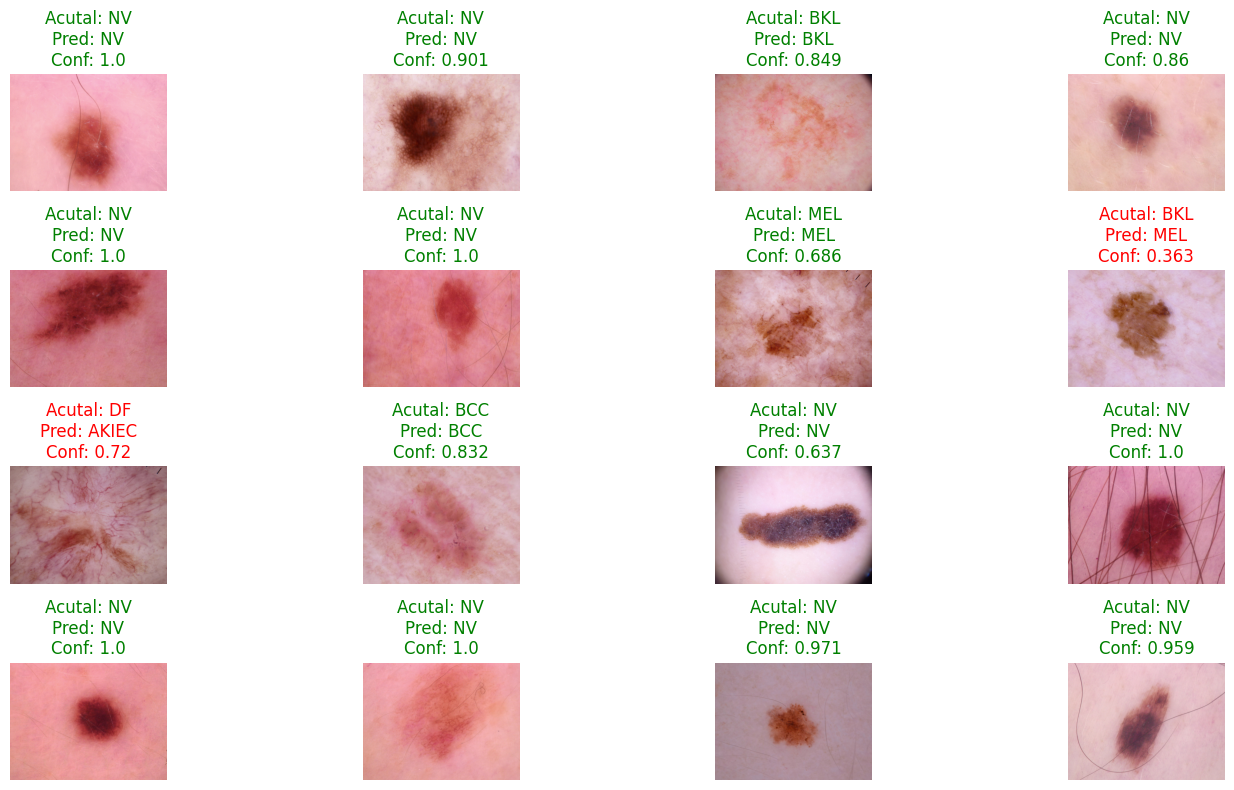

In [35]:
show_predict(4)

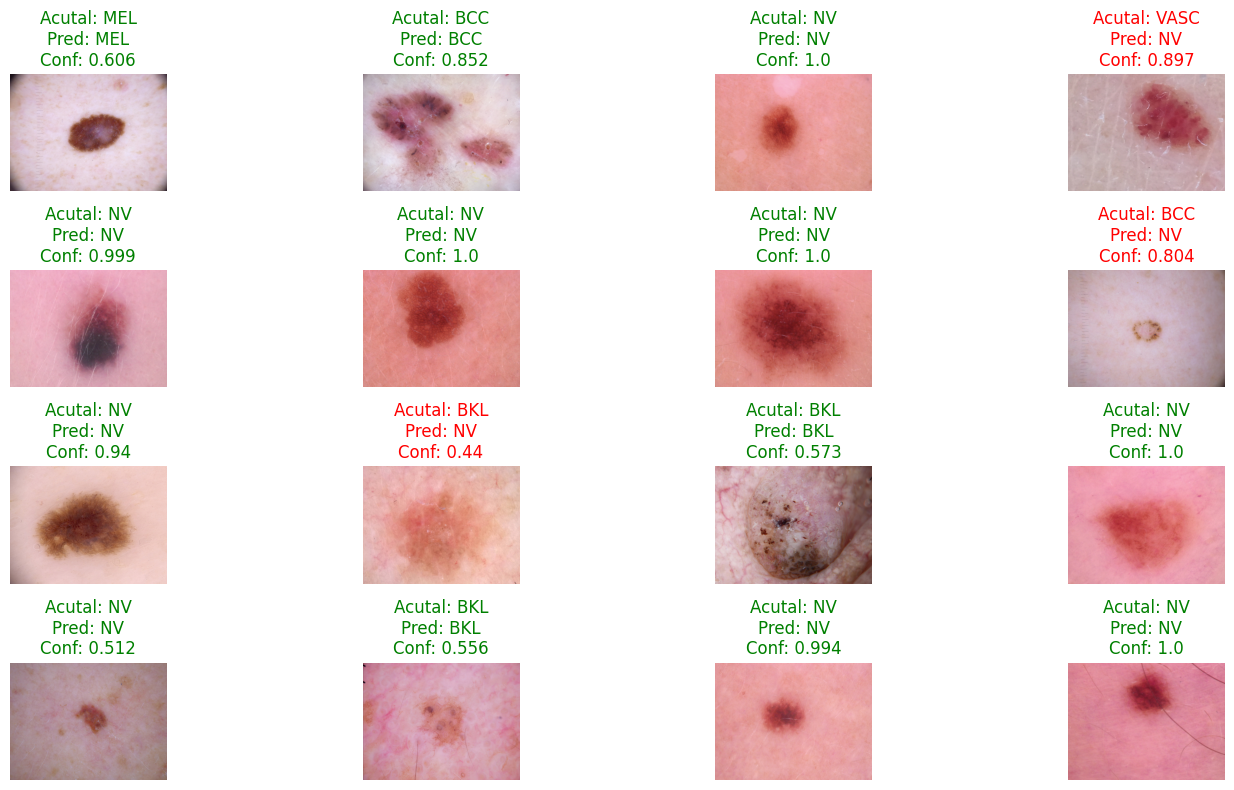

In [36]:
show_predict(5)

In [42]:
import pandas as pd
# Evaluate the model and store the predictions
y_pred = []
model.eval()
with torch.no_grad():
    for i, data in enumerate(test_loader):
        imgs, labels = data
        imgs, labels = imgs.to('cuda'), labels.to('cuda')
        
        scores = model(imgs)
        prod = torch.softmax(scores, dim=1)
        pred = prod.max(dim=1)[1]
        y_pred.extend(pred.cpu().detach().numpy())

# Create a new dataframe with the file paths, true labels, and predicted labels
results_df = pd.DataFrame({
    "file_path": test_df["img_paths"],
    "true_label": test_df["classnames"],
    "predicted_label": y_pred
})
#label_dict = {"MEL", "NV", "BCC", "AKIEC", "BKL", "DF", "VASC"}
# Map from class indices to class labels
label_dict = {
   0: "MEL",
   1: "NV",
   2: "BCC",
   3: "AKIEC",
   4: "BKL",
   5: "DF",
   6: "VASC",
    # Add more mappings here if needed
}

# Replace the class indices with class labels
#results_df["true_label"] = results_df["true_label"].map(label_dict)
results_df["predicted_label"] = results_df["predicted_label"].map(label_dict)

# Calculate the correctness column where 1 means correct and 0 means incorrect
results_df["correctness"] = (results_df["true_label"] == results_df["predicted_label"]).astype(int)

# Save the dataframe to a CSV file
results_df.to_csv("results.csv", index=False)
